In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
import matplotlib.pyplot as plt

# Download stopwords resource
nltk.download('stopwords')
nltk.download('wordnet')

def read_data(file_path):
    return pd.read_csv(file_path)

# Loading dataset
file_path = "fakenews.csv"
data = read_data(file_path)

# Ensure the loaded data has the expected structure
if 'claim' not in data.columns or 'label' not in data.columns:
    raise ValueError("The dataset should contain 'claim' and 'label' columns.")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\34622\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\34622\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [13]:
# Handling Missing Values
data['claim'].fillna('', inplace=True)

# Text Preprocessing
data['claim'] = data['claim'].str.lower()  # Convert text to lowercase
data['claim'] = data['claim'].str.replace('[^\w\s]', '')  # Remove punctuation
data['claim'] = data['claim'].apply(lambda x: x.split())  # Tokenization

# Remove Stop Words (optional)
stop_words = set(stopwords.words('english'))
data['claim'] = data['claim'].apply(lambda x: [word for word in x if word not in stop_words])

# Lemmatization (optional)
lemmatizer = WordNetLemmatizer()
data['claim'] = data['claim'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

# Convert list of words back to a string
data['claim'] = data['claim'].apply(lambda x: ' '.join(x))

# Convert label to numeric (TRUE: 1, FALSE: 0)
label_encoder = LabelEncoder()
data['label'] = label_encoder.fit_transform(data['label'])

Accuracy: 0.55
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.52      0.58        25
           1       0.45      0.59      0.51        17

    accuracy                           0.55        42
   macro avg       0.55      0.55      0.55        42
weighted avg       0.57      0.55      0.55        42



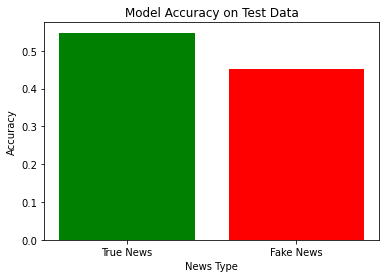

In [14]:
# Define the train_model function
def train_model(X_train, y_train):
    # Convert text data to TF-IDF features
    tfidf_vectorizer = TfidfVectorizer(max_features=3000, stop_words='english')
    X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

    # Train a Logistic Regression model
    model = LogisticRegression()
    model.fit(X_train_tfidf, y_train)

    return model, tfidf_vectorizer

# Train the model
model, tfidf_vectorizer = train_model(X_train, y_train)

# Make predictions on the test set
X_test_tfidf = tfidf_vectorizer.transform(X_test)
predictions = model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")

# Display classification report
print("Classification Report:")
print(classification_report(y_test, predictions))

# Visualize the results
labels = ['True News', 'Fake News']
accuracy_values = [accuracy_score(y_test, predictions), 1 - accuracy_score(y_test, predictions)]

plt.bar(labels, accuracy_values, color=['green', 'red'])
plt.xlabel('News Type')
plt.ylabel('Accuracy')
plt.title('Model Accuracy on Test Data')
plt.show()

In [15]:
#Testing with our own piece of text:
def predict_text(text, model, tfidf_vectorizer):
    text_tfidf = tfidf_vectorizer.transform([text])
    prediction = model.predict(text_tfidf)
    if prediction[0] == 1:
        return "Fake News"
    else:
        return "True News"

# Example usage:
# Input text for prediction
input_text = "Donald Trump has won the 2022 election"

# Predict the label for input text
predicted_label = predict_text(input_text, model, tfidf_vectorizer)
print(f"Predicted Label: {predicted_label}")

Predicted Label: True News
